In [22]:
!pip install xgboost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('/Users/mayankkapadia/Desktop/SJSUMATERIAL/SEM1/DV/Project/TrafficLabelling /modified_daata.csv')

In [3]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.5-88-49183-6,192.168.10.5,49183,192.168.10.3,88,6,4/7/2017 8:54,900,9,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.5-88-49184-6,192.168.10.5,49184,192.168.10.3,88,6,4/7/2017 8:54,1205,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.5-88-49185-6,192.168.10.5,49185,192.168.10.3,88,6,4/7/2017 8:54,511,7,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.5-88-49186-6,192.168.10.5,49186,192.168.10.3,88,6,4/7/2017 8:54,773,9,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
#Removing the necessary object column for the prediction
df=df.drop(['Flow ID',' Timestamp',' Source IP',' Destination IP'],axis=1)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(' Label',axis=1),df[' Label'],test_size=0.2,random_state=42)

In [6]:
print("X-Train Shape",X_train.shape)
print("X-Test Shape",X_test.shape)
print("Y-Train Shape",y_train.shape)
print("Y-Test Shape",y_test.shape)

X-Train Shape (2558780, 80)
X-Test Shape (639695, 80)
Y-Train Shape (2558780,)
Y-Test Shape (639695,)


In [7]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
y_train_encoded=lb.fit_transform(y_train)
y_test_encoded=lb.fit_transform(y_test)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import time
import tracemalloc

## XGBoost Classifier

As we go down the implementation we can observe that XG Classifier is the best model for our dataset so that the reason we are doing the total time it take to train and also the memory it uses for comparing those with PCA and without PCA

In [10]:
xgb=XGBClassifier()
tracemalloc.start()
start_time=time.time()
xgb.fit(X_train,y_train_encoded)
time_taken_wo_pca=time.time()-start_time
memory_usage_wo_pca=tracemalloc.get_traced_memory()
y_pred_encoded_xgb=xgb.predict(X_test)
y_pred_xgb=lb.inverse_transform(y_pred_encoded_xgb)
acc_xgb=accuracy_score(y_test,y_pred_xgb)
print("ACcuracy Score:",acc_xgb)
print("Time Taken without PCA:",time_taken_wo_pca)

ACcuracy Score: 0.9998936993410923
Time Taken without PCA: 282.9353928565979


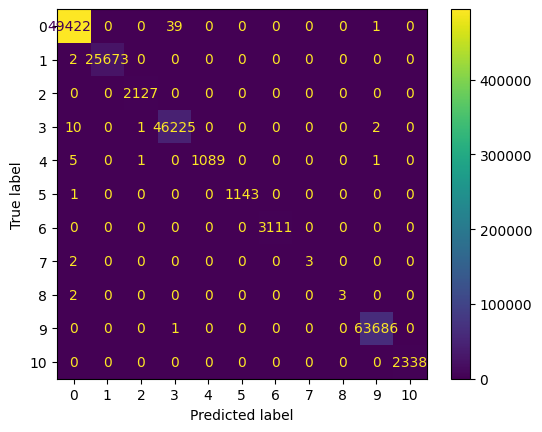

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_xgb=confusion_matrix(y_test,y_pred_xgb)
disp_xgb=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb)
disp_xgb.plot()

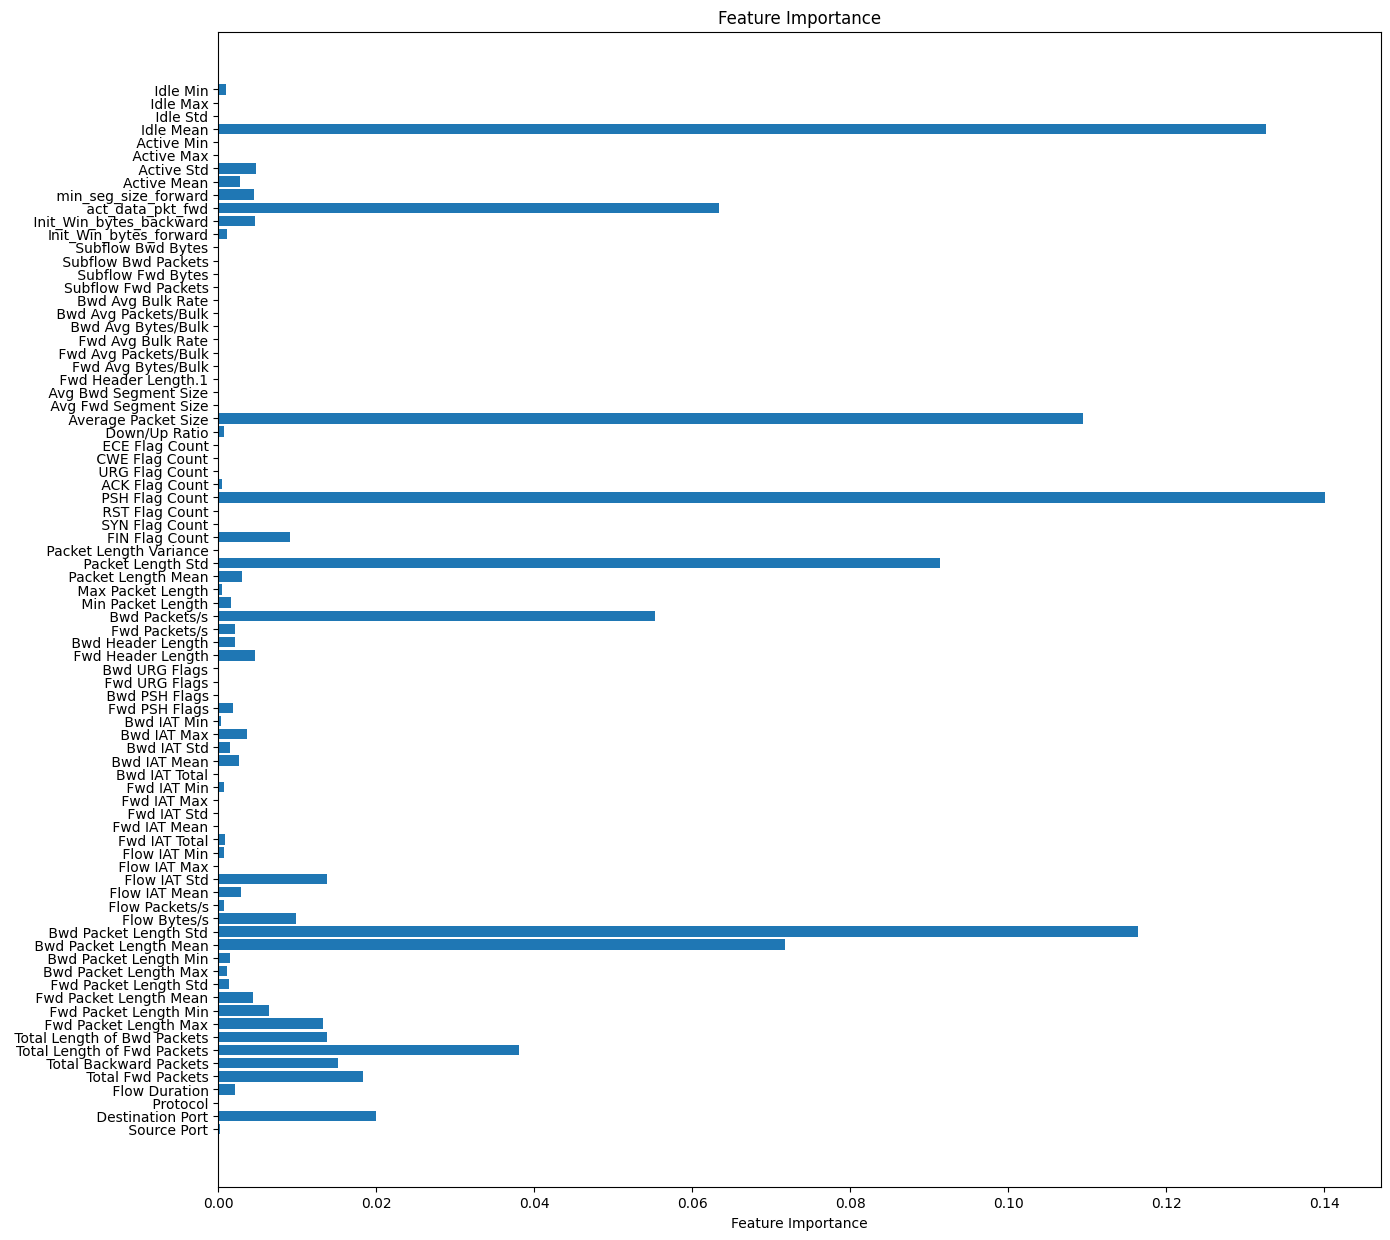

In [12]:
from matplotlib import pyplot as plt

# Feature Importance Bar Chart

plt.figure(figsize=(15,15))
importance_xgb=xgb.feature_importances_
features=df.columns[:-1]

plt.barh(features,importance_xgb)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

## Random Forest Classifier

In [13]:
rdfor=RandomForestClassifier()
rdfor.fit(X_train,y_train_encoded)
y_pred_encoded_rfc=rdfor.predict(X_test)
y_pred_rfc=lb.inverse_transform(y_pred_encoded_rfc)
acc_rfc=accuracy_score(y_test,y_pred_rfc)
print("Accuracy Score",acc_rfc)

Accuracy Score 0.9995826135892887


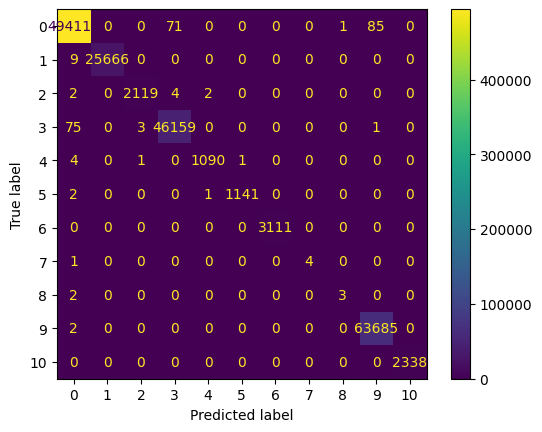

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_rfc=confusion_matrix(y_test,y_pred_rfc)
disp_rfc=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc)
disp_rfc.plot()

In [15]:
from matplotlib import pyplot as plt

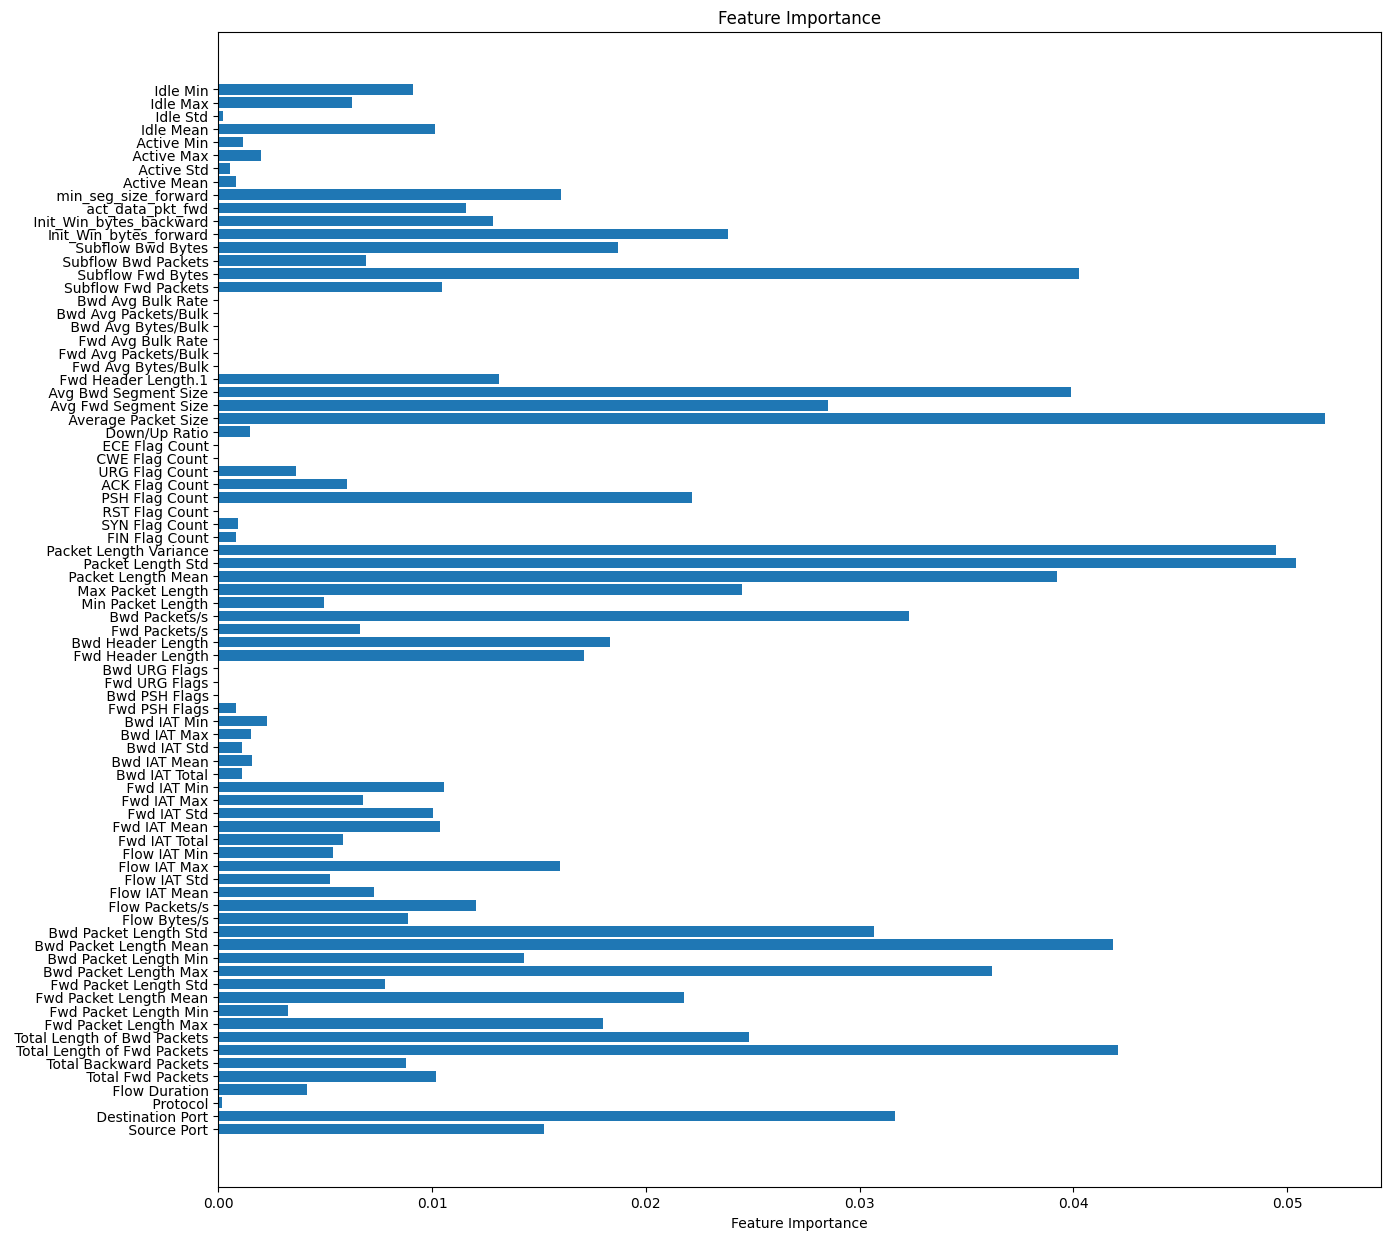

In [16]:
# Feature Importance Bar Chart

plt.figure(figsize=(15,15))
importance_rfc=rdfor.feature_importances_
features=df.columns[:-1]

plt.barh(features,importance_rfc)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

## Decision Tree Classifier

In [45]:
dcv=DecisionTreeClassifier()
dcv.fit(X_train,y_train_encoded)
y_pred_encoded_dcv=dcv.predict(X_test)
y_pred_dcv=lb.inverse_transform(y_pred_encoded_dcv)
acc_dcv=accuracy_score(y_test,y_pred_dcv)
print("Accuracy Score:",acc_dcv)

Accuracy Score: 0.9997827167595722


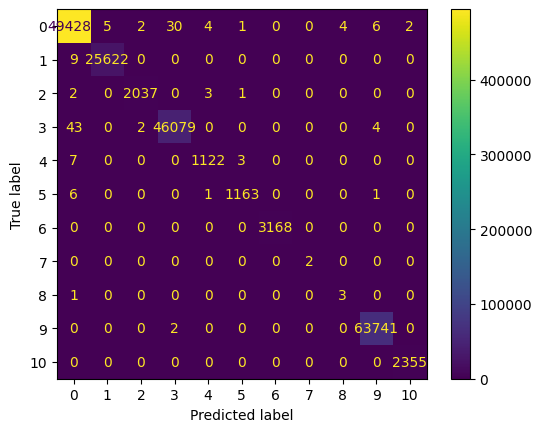

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_dcv=confusion_matrix(y_test,y_pred_dcv)
disp_dcv=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dcv)
disp_dcv.plot()

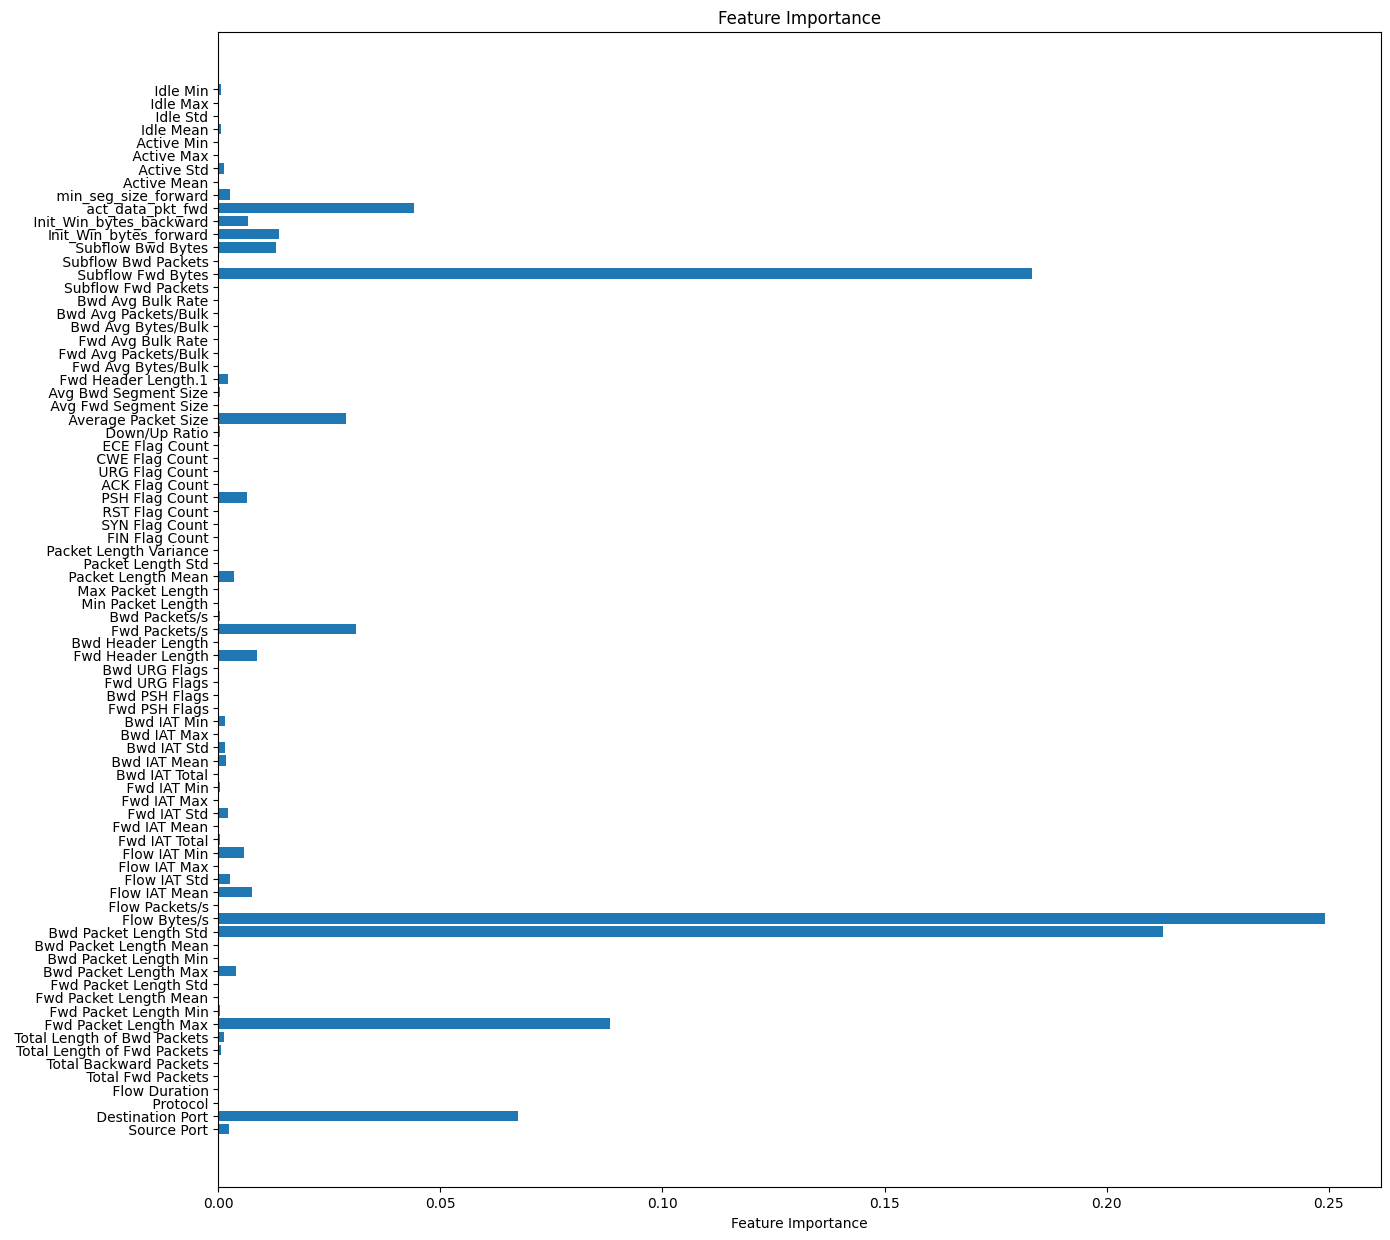

In [47]:
# Feature Importance Bar Chart

plt.figure(figsize=(15,15))
importance_dcv=dcv.feature_importances_
features=df.columns[:-1]

plt.barh(features,importance_dcv)
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

## Logistic Regression

In [48]:
lr=LogisticRegression()
lr.fit(X_train,y_train_encoded)
y_pred_encoded_lr=lr.predict(X_test)
y_pred_lr=lb.inverse_transform(y_pred_encoded_lr)
acc_lr=accuracy_score(y_test,y_pred_lr)
print("Accuracy Score:",acc_lr)

/Users/mayankkapadia/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9692348816197137


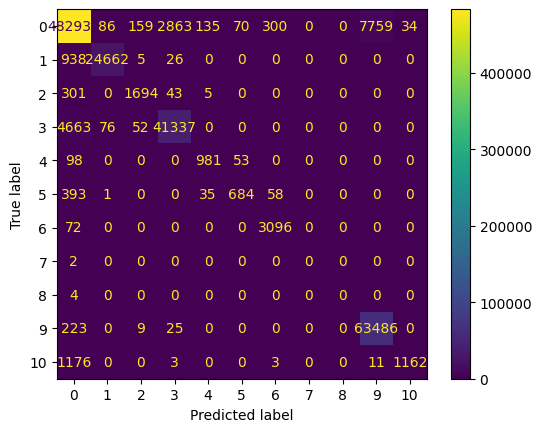

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_lr=confusion_matrix(y_test,y_pred_lr)
disp_lr=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr)
disp_lr.plot()

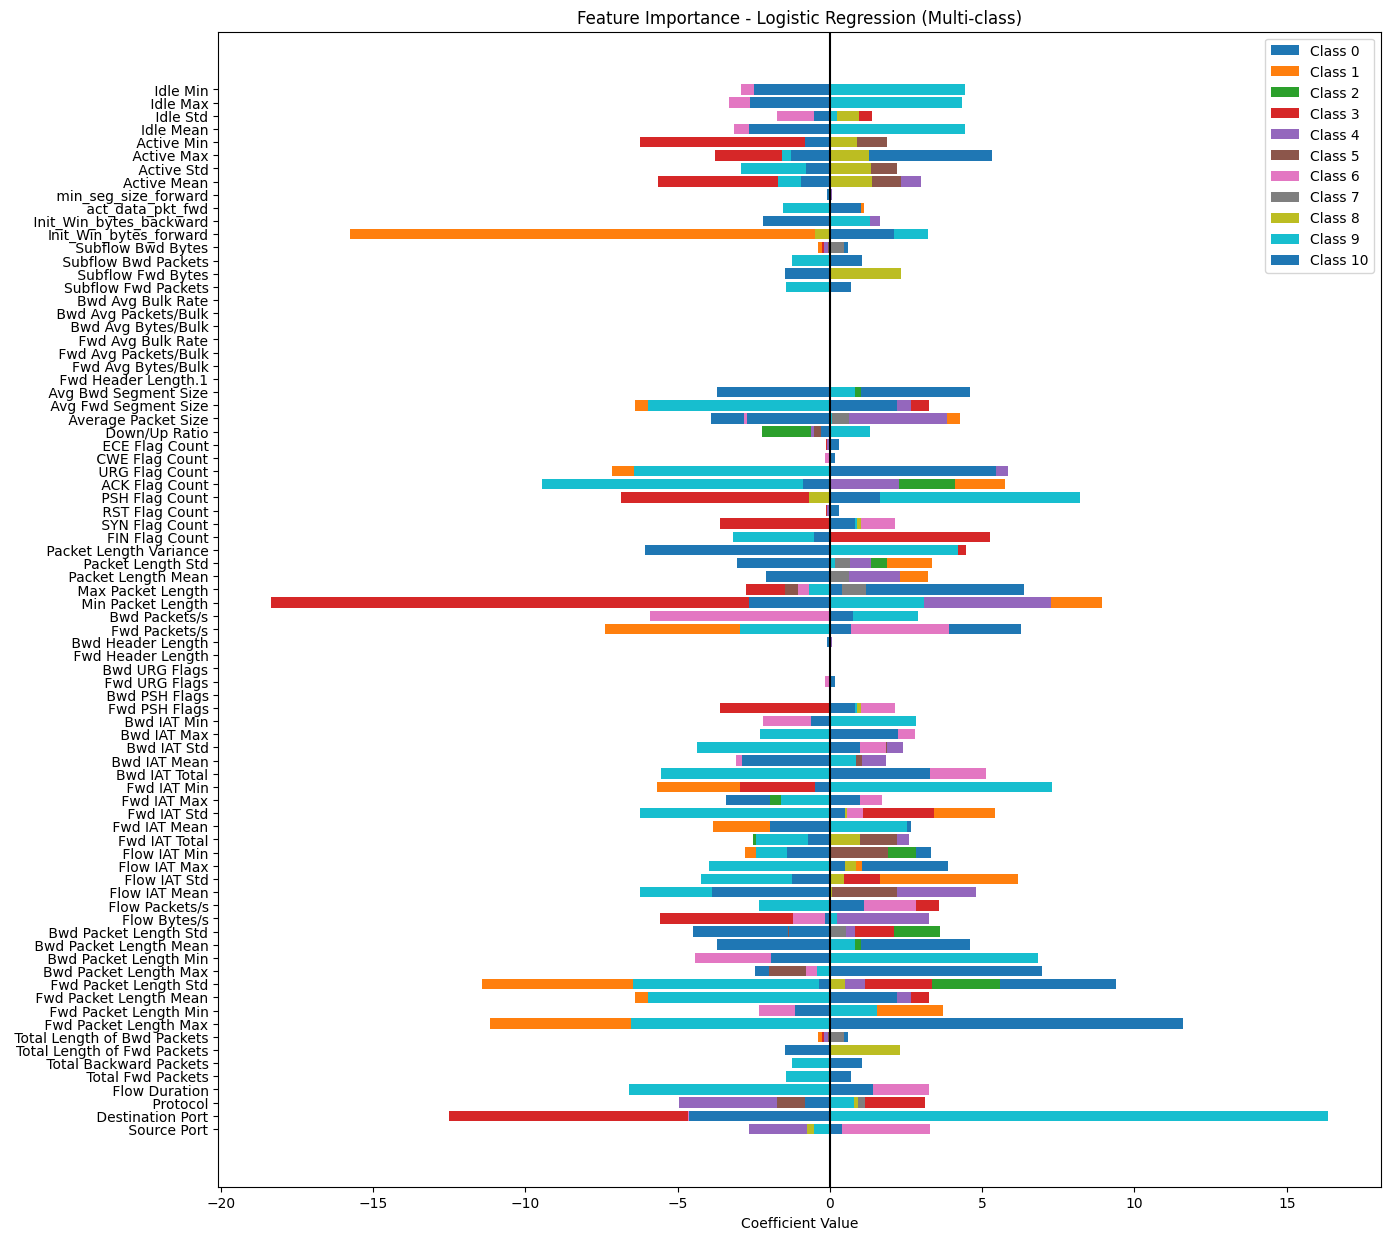

In [50]:
# As the feature Importance is only there for the tree based classifier so for LR we are using coefficient which is the closest proximity

coeff_lr=lr.coef_
features = df.columns[:-1] # Replace with feature names
classes = lr.classes_  # Class labels

# Plotting coefficients for each class
plt.figure(figsize=(15,15))
for idx, cls in enumerate(classes):
    plt.barh(features, coeff_lr[idx], label=f'Class {cls}')
plt.axvline(0, color='black')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Logistic Regression (Multi-class)')
plt.legend()
plt.show()

## Gaussian Naive Bayes

In [51]:
gnb=GaussianNB()
gnb.fit(X_train,y_train_encoded)
y_pred_encoded_gnb=gnb.predict(X_test)
y_pred_gnb=lb.inverse_transform(y_pred_encoded_gnb)
acc_gnb=accuracy_score(y_test,y_pred_gnb)
print("Accuracy Score",acc_gnb)

Accuracy Score 0.862708255825223


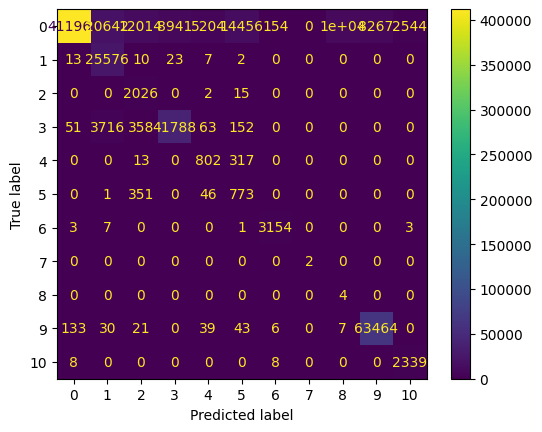

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_gnb=confusion_matrix(y_test,y_pred_gnb)
disp_gnb=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gnb)
disp_gnb.plot()

## Comparing the Accuracy of each model and using the best model

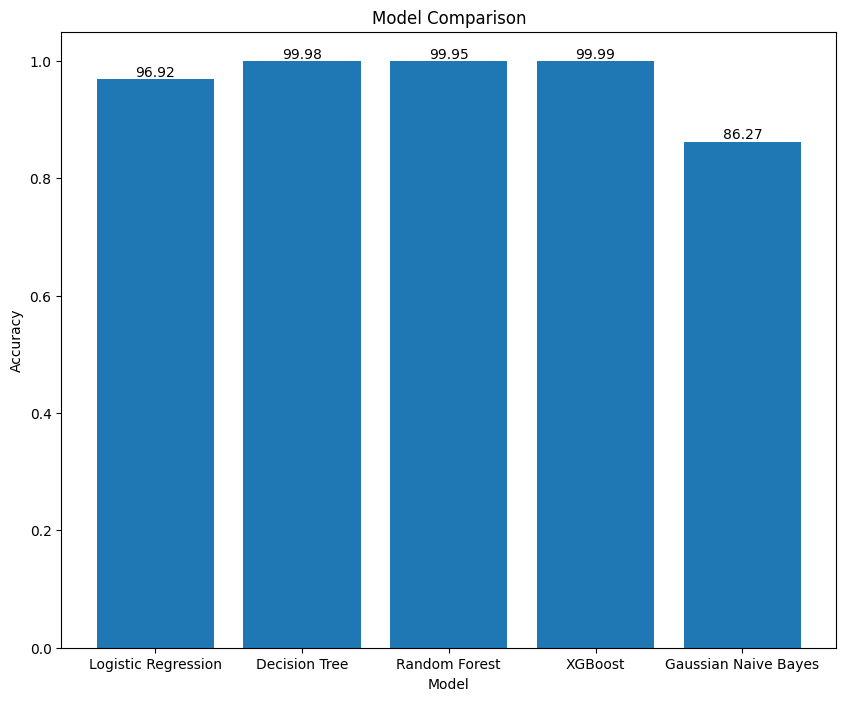

In [66]:
models=['Logistic Regression','Decision Tree','Random Forest','XGBoost','Gaussian Naive Bayes']
accuracy=[acc_lr,acc_dcv,acc_rfc,acc_xgb,acc_gnb]

plt.figure(figsize=(10,8))
bars=plt.bar(models,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Comparison')

for bar,acc in zip(bars,accuracy):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),f'{acc*100:.2f}',ha="center",va="bottom")
plt.show()

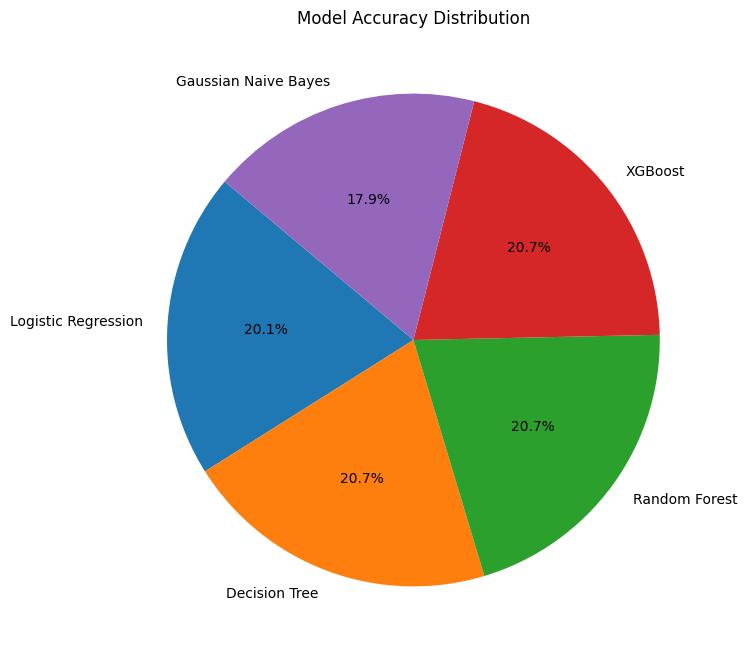

In [59]:
prediction={
    "Logistic Regression":acc_lr,
    "Decision Tree":acc_dcv,
    "Random Forest":acc_rfc,
    "XGBoost":acc_xgb,
    "Gaussian Naive Bayes":acc_gnb
}

plt.figure(figsize=(8, 8))
plt.pie(prediction.values(), labels=prediction.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Model Accuracy Distribution')
plt.show()

### Based on your observation about the accuracy of various model, we can easily conclude that the XGboost ML Model provided the best accuracy and got the best confusion matrix out of all 5 so its an great idea to use it for our project going forward. Before going to next step of our projection, we trying to see the effect of applying PCA how its affect the accuracy and time take to train a model.

### So understand about various values on n_components and which is the best one to be used for the PCA in our model we compare them on the basis of the accuracy and also on the basis of the time taken to train a model and also the memory it uses

In [114]:
#To understand the best n_components hyperparamarter

acc_diff_comp=[]
time_taken_diff_comp=[]
memory_usage_diff_comp=[]
for n in [0.90, 0.95, 0.99, 0.999]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model = XGBClassifier(n_estimators=100)
    tracemalloc.start()
    start_time=time.time()
    model.fit(X_train_pca, y_train_encoded)
    time_taken=time.time()-start_time
    memory=tracemalloc.get_traced_memory()
    time_taken_diff_comp.append(time_taken)
    memory_usage_diff_comp.append(memory)
    y_pred_encoded_pca= model.predict(X_test_pca)
    y_pred_pca=lb.inverse_transform(y_pred_encoded_pca)
    
    accuracy = accuracy_score(y_test, y_pred_pca)
    acc_diff_comp.append(accuracy)
    print(f"Accuracy with n_components={n}: {accuracy:.4f}")

Accuracy with n_components=0.9: 0.9975
Accuracy with n_components=0.95: 0.9975
Accuracy with n_components=0.99: 0.9981
Accuracy with n_components=0.999: 0.9983


In [115]:
from matplotlib import pyplot as plt

In [130]:
memory_red_diff_comp=[]
for x in memory_usage_diff_comp:
    reduce=(x[1]-x[0])/(1024**3)
    memory_red_diff_comp.append(reduce)

In [132]:
memory_red_diff_comp

[3.1601155512034893, 3.0266646929085255, 3.007600348442793, 3.007600348442793]

In [146]:
for x in range(0,len(acc_diff_comp)):
    acc_diff_comp[x]=acc_diff_comp[x]*100

In [147]:
df_n_comp=pd.DataFrame({'Variance Threshold':[0.90, 0.95, 0.99, 0.999],
                        'Accuracy':acc_diff_comp,
                         'Memory_Usage GB':memory_red_diff_comp,
                         'Time Taken to Train Model':time_taken_diff_comp})
df_n_comp

,Variance Threshold,Accuracy,Memory_Usage GB,Time Taken to Train Model
0,0.900,99.745191,3.160116,160.895469
1,0.950,99.754102,3.026665,190.082128
2,0.990,99.806783,3.007600,235.115457
3,0.999,99.826480,3.007600,272.662835


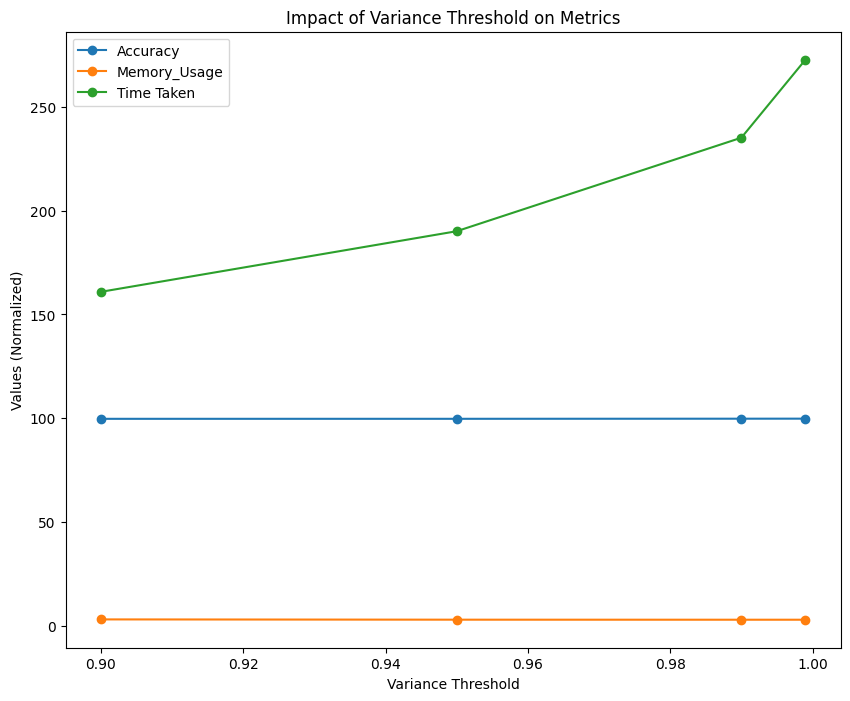

In [148]:
plt.figure(figsize=(10,8))
plt.plot(df_n_comp['Variance Threshold'],df_n_comp['Accuracy'],label='Accuracy',marker='o')
plt.plot(df_n_comp['Variance Threshold'],df_n_comp['Memory_Usage GB'],label='Memory_Usage',marker='o')
plt.plot(df_n_comp['Variance Threshold'],df_n_comp['Time Taken to Train Model'],label='Time Taken',marker='o')
plt.title('Impact of Variance Threshold on Metrics')
plt.xlabel('Variance Threshold')
plt.ylabel('Values (Normalized)')
plt.legend()

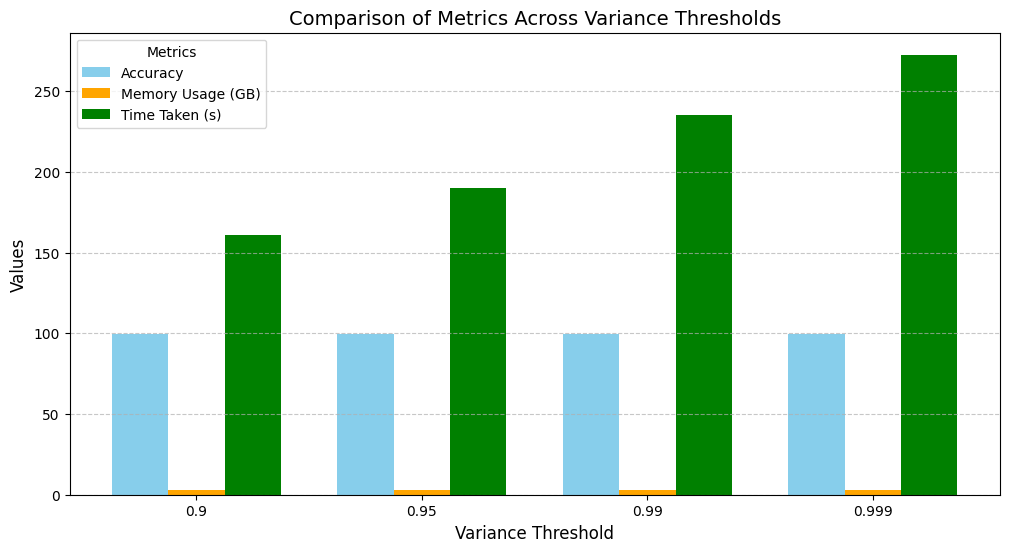

In [161]:
x = np.arange(len(df_n_comp['Variance Threshold']))  # Positions for each variance threshold
bar_width = 0.25  # Width of each bar

# Plot each metric
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, df_n_comp['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar(x, df_n_comp['Memory_Usage GB'], bar_width, label='Memory Usage (GB)', color='orange')
plt.bar(x + bar_width, df_n_comp['Time Taken to Train Model'], bar_width, label='Time Taken (s)', color='green')

# Add labels and legend
plt.title('Comparison of Metrics Across Variance Thresholds', fontsize=14)
plt.xlabel('Variance Threshold', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(x, df_n_comp['Variance Threshold'])  # Set the x-axis labels to variance thresholds
plt.legend(title='Metrics', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Based on the above two visualisation we can easily say that the variance threshold with 0.99 is the best fit reason being simple its giving the same accuracy as the 0.999 which is 99.81% and with less time

In [ ]:
#Calculating PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=0.99)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
X_train_pca=pd.DataFrame(X_train_pca)
X_test_pca=pd.DataFrame(X_test_pca)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_pca = StandardScaler()
X_train_pca = scaler_pca.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

In [ ]:
xgb_pca=XGBClassifier()
tracemalloc.start()
start_time=time.time()
xgb_pca.fit(X_train_pca,y_train_encoded)
memory_usage_pca=tracemalloc.get_traced_memory()
time_taken_pca=time.time()-start_time
y_pred_encoded=xgb_pca.predict(X_test_pca)
y_pred_pca_xgb=lb.inverse_transform(y_pred_encoded)
acc_xgb_pca=accuracy_score(y_test,y_pred_pca_xgb)
print("Accuracy:",acc_xgb_pca)
print("Time Taken with PCA:",time_taken_pca)

In [ ]:
conf_matrix_pca_xgb=confusion_matrix(y_test,y_pred_pca_xgb)
disp_xgb_pca=ConfusionMatrixDisplay(conf_matrix_pca_xgb)
disp_xgb_pca.plot()

In [ ]:
xgb.save_model('/Users/mayankkapadia/Desktop/SJSUMATERIAL/SEM1/DV/Project/Packages and Models/xgb_model.model')

In [ ]:
xgb_pca.save_model('/Users/mayankkapadia/Desktop/SJSUMATERIAL/SEM1/DV/Project/Packages and Models/xgb_pca.model')

In [178]:
column=['Dataset','Accuracy','Memory Usage']
value=[['Without PCA',acc_xgb,memory_usage_wo_pca],['With PCA',acc_xgb_pca,memory_usage_pca]]

df_1=pd.DataFrame({
    'Dataset':['Without PCA','With PCA'],
    'Accuracy':[acc_xgb*100,acc_xgb_pca*100],
    'Memory Usage':[(memory_usage_wo_pca[1]-memory_usage_wo_pca[0])/(1024**2),(memory_usage_pca[1]-memory_usage_pca[0])/(1024**2)],
    'Time Taken':[time_taken_wo_pca,time_taken_pca]
})
df_1

,Dataset,Accuracy,Memory Usage,Time Taken
0,Without PCA,99.989370,24.395108,290.131819
1,With PCA,99.806158,24.390344,210.937284


In [179]:
import seaborn as sns

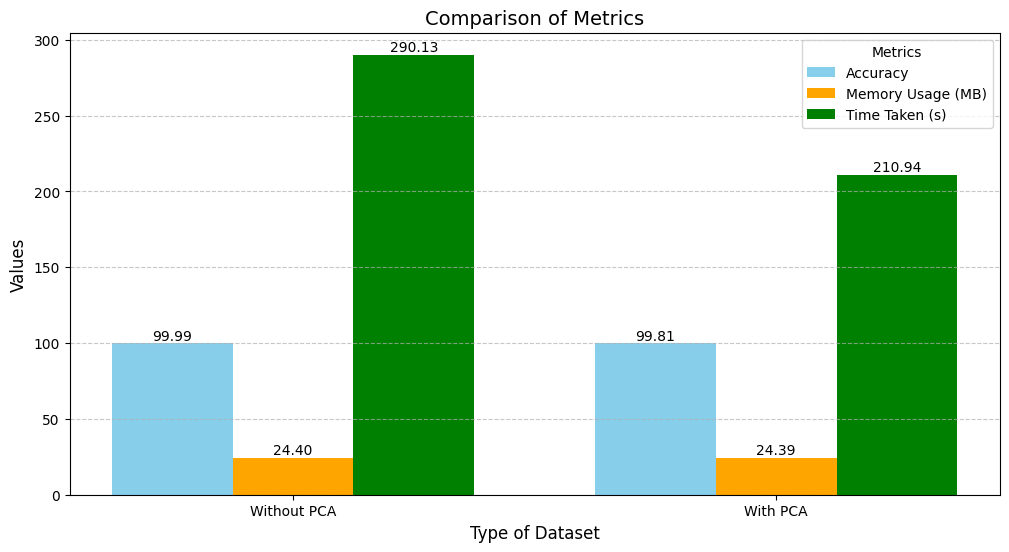

In [185]:
x = np.arange(len(df_1['Dataset'])) 
bar_width = 0.25  # Width of each bar

# Plot each metric
plt.figure(figsize=(12, 6))
bar_1=plt.bar(x - bar_width, df_1['Accuracy'], bar_width, label='Accuracy', color='skyblue')
bar_2=plt.bar(x, df_1['Memory Usage'], bar_width, label='Memory Usage (MB)', color='orange')
bar_3=plt.bar(x + bar_width, df_1['Time Taken'], bar_width, label='Time Taken (s)', color='green')

for bars_1,bars_2,bars_3,v1,v2,v3 in zip(bar_1,bar_2,bar_3,df_1['Accuracy'],df_1['Memory Usage'],df_1['Time Taken']):
    plt.text(bars_1.get_x()+bars_1.get_width()/2,bars_1.get_height(),f'{v1:0.2f}',ha='center',va='bottom')
    plt.text(bars_2.get_x()+bars_2.get_width()/2,bars_2.get_height(),f'{v2:0.2f}',ha='center',va='bottom')
    plt.text(bars_3.get_x()+bars_3.get_width()/2,bars_3.get_height(),f'{v3:0.2f}',ha='center',va='bottom')

# Add labels and legend
plt.title('Comparison of Metrics', fontsize=14)
plt.xlabel('Type of Dataset', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(x, df_1['Dataset'])  # Set the x-axis labels to variance thresholds
plt.legend(title='Metrics', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### We compare the model with PCA and without PCA there accuracy, memory used and also the time taken to train the model and it is clearly evident we are getting almost similar accuracy but wuth less time as shown from above bar chart.

## Data Visualization Insights

### Confusion Matrix for all the models:
By carefully analyzing the confusion matrices we observed distinct patterns in the classification performance of each model. Among all the models, the Gaussian Naive Bayes classifier demonstrated theweakest performance, as evidenced by the poor values along its diagonal, which correspond to correct predictions. This indicates a higher rate of misclassification compared to the other models, making it unsuitable for our analysis. The Logistic Regression model also exhibited limitations,particularly with an elevated number of misclassified instances concentrated in the first row of its confusion matrix. This suggests a bias in its predictions, which compromises its overall reliability when compared to tree-based models. Focusing on the tree-based classifiers — Decision Tree, Random Forest, and XGBoost — we evaluated their confusion matrices based on the number of off-diagonal elements, which represent misclassified samples. XGBoost emerged as the most robust model, with the fewest off-diagonal values, implying the highest precision in its predictions. Additionally, XGBoost’sconfusion matrix contained the largest proportion of zero en-tries outside the diagonal, further supporting its superior ability to accurately classify data across all categories. In summary, the confusion matrix analysis reinforces our conclusion that the XGBoost classifier significantly outperforms the other models, not only in terms of accuracy metrics but also in its ability to minimize misclassifications. This finding aligns with and substantiates the results derived from the accuracy metrics, solidifying XGBoost as the optimal choice for our dataset.

### Feature Importance Bar Charts for all the models:

Tree-based models (Decision Tree, Random Forest, and XGBoost) and Logistic Regression were analyzed for feature importance. Random Forest emphasized a broad range of features, potentially leading to overfitting, while XGBoost and Decision Tree identified fewer, more critical features. XGBoost stood out with a clearer feature ranking and superior performance, making it the best choice for further analysis. Logistic Regression provided interpretable coefficients but lacked clarity in delineating significant predictors due to its linear assumptions, highlighting its limitations in capturing complex patterns in the dataset.